In [1]:
!mkdir -p "/content/drive/MyDrive/Colab Datasets/vacina-covid"


In [2]:
!wget -P "/content/drive/MyDrive/Colab Datasets/vacina-covid" https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/PNI/vacina/uf/2021-11-02/uf%3DSC/part-00000-c5a56d0d-d75b-462b-a83a-be8ec631eea2.c000.csv


--2021-11-03 12:30:23--  https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/PNI/vacina/uf/2021-11-02/uf%3DSC/part-00000-c5a56d0d-d75b-462b-a83a-be8ec631eea2.c000.csv
Resolving s3-sa-east-1.amazonaws.com (s3-sa-east-1.amazonaws.com)... 52.95.163.26
Connecting to s3-sa-east-1.amazonaws.com (s3-sa-east-1.amazonaws.com)|52.95.163.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5323348695 (5.0G) [text/csv]
Saving to: ‘/content/drive/MyDrive/Colab Datasets/vacina-covid/part-00000-c5a56d0d-d75b-462b-a83a-be8ec631eea2.c000.csv’

part-00000-c5a56d0d 100%[===================>]   4.96G  22.5MB/s    in 3m 52s  

2021-11-03 12:34:16 (21.9 MB/s) - ‘/content/drive/MyDrive/Colab Datasets/vacina-covid/part-00000-c5a56d0d-d75b-462b-a83a-be8ec631eea2.c000.csv’ saved [5323348695/5323348695]



Aprendendo Pandas



In [3]:
import pandas as pd
import seaborn as sns


In [4]:
sns.set()

In [7]:
vacina_SC = pd.read_csv('/content/drive/MyDrive/Colab Datasets/vacina-covid/part-00000-c5a56d0d-d75b-462b-a83a-be8ec631eea2.c000.csv', sep=';')

In [8]:
vacina_SC.head()

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,paciente_endereco_nmpais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumnacionalidade,estabelecimento_valor,estabelecimento_razaosocial,estalecimento_nofantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoatendimento_codigo,vacina_grupoatendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
0,d276fc1b-7723-4a52-b16b-8652c4dfa4d5-i0b0,b09127ea162537d92e69d47cec53f15d3a5905bc451e1a...,22.0,1999-04-11,F,1.0,BRANCA,421120.0,10.0,MORRO DA FUMACA,BRASIL,SC,88830.0,B,2419386,PREFEITURA MUNICIPAL DE MORRO DA FUMACA,ESF PERPETUA ZEFERINO MARTINS,421120,MORRO DA FUMACA,SC,201,Pessoas de 18 a 64 anos,2.0,Faixa Etária,210362,SINOVAC/BUTANTAN,Organization/61189445000156,2021-08-23,1ª Dose,86,COVID-19 SINOVAC/BUTANTAN - CORONAVAC,Novo PNI,2021-08-23T18:05:26.000Z,16341
1,31829b2a-a3da-400f-b86f-42f99399386b-i0b0,78e45a4634cc54f0dd45995a663313381f328ecc87a858...,24.0,1997-01-31,F,3.0,PARDA,421930.0,10.0,VIDEIRA,BRASIL,SC,89566.0,B,2302071,PREFEITURA MUNICIPAL DE VIDEIRA,POSTO DE ASSISTENCIA MEDICA,421930,VIDEIRA,SC,1801,Gestante,21.0,Gestantes,210114,SINOVAC/BUTANTAN,NaN,2021-06-29,1ª Dose,86,COVID-19 SINOVAC/BUTANTAN - CORONAVAC,G-MUS - Gestão Municipal de Saúde,2021-06-29T18:24:27.000Z,18884
2,c50cf238-d545-47d4-bd7e-96ecfbd14f9e-i0b0,94ab6ad40b711fc521f288085bd73c11f11ec25e638b7d...,52.0,1968-07-16,F,1.0,BRANCA,420240.0,10.0,BLUMENAU,BRASIL,SC,89010.0,B,7983409,MUNICIPIO DE BLUMENAU,VIGILANCIA EPIDEMIOLOGICA,420240,BLUMENAU,SC,107,Hipertensão de difícil controle ou com complic...,1.0,Comorbidades,214VCD080Z,ASTRAZENECA/FIOCRUZ,Organization/33781055000135,2021-05-29,1ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,Novo PNI,2021-06-21T16:48:30.000Z,16341
3,7ab9a020-e590-4a30-8c71-75d967b454d5-i0b0,737ca0b1631b7003cf771f48570058473fd6f88b078f6b...,69.0,1951-11-30,M,1.0,BRANCA,420630.0,10.0,GUABIRUBA,BRASIL,SC,88360.0,B,2512955,MUNICIPIO DE GUABIRUBA,UNIDADE DE SAUDE DE GUABIRUBA,420630,GUABIRUBA,SC,202,Pessoas de 65 a 69 anos,2.0,Faixa Etária,210045,SINOVAC/BUTANTAN,NaN,2021-03-30,1ª Dose,86,COVID-19 SINOVAC/BUTANTAN - CORONAVAC,IDS SAUDE,2021-03-30T14:48:52.000Z,18591
4,dc9f9fcc-6cc8-4897-9e64-9577242772ae-i0b0,f602f9f0a1240533c4dae8d4ff3a70ef67294be8d4179b...,54.0,1966-11-13,F,1.0,BRANCA,420850.0,10.0,ITUPORANGA,BRASIL,SC,88400.0,B,2377810,MUNICIPIO DE ITUPORANGA,UNIDADE SANITARIA CENTRO DE ITUPORANGA,420850,ITUPORANGA,SC,201,Pessoas de 18 a 64 anos,2.0,Faixa Etária,FC2495,PFIZER,Organization/00394544000851,2021-06-19,1ª Dose,87,COVID-19 PFIZER - COMIRNATY,Novo PNI,2021-06-19T16:56:41.000Z,16341


In [9]:
vacina_SC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10073731 entries, 0 to 10073730
Data columns (total 34 columns):
 #   Column                                    Dtype  
---  ------                                    -----  
 0   document_id                               object 
 1   paciente_id                               object 
 2   paciente_idade                            float64
 3   paciente_datanascimento                   object 
 4   paciente_enumsexobiologico                object 
 5   paciente_racacor_codigo                   float64
 6   paciente_racacor_valor                    object 
 7   paciente_endereco_coibgemunicipio         float64
 8   paciente_endereco_copais                  float64
 9   paciente_endereco_nmmunicipio             object 
 10  paciente_endereco_nmpais                  object 
 11  paciente_endereco_uf                      object 
 12  paciente_endereco_cep                     float64
 13  paciente_nacionalidade_enumnacionalidade  object 
 14  

In [10]:
vacina_SC.describe(include='all')

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,paciente_endereco_nmpais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumnacionalidade,estabelecimento_valor,estabelecimento_razaosocial,estalecimento_nofantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoatendimento_codigo,vacina_grupoatendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
count,10073731,10073726,1.007373e+07,10073726,10073726,1.007373e+07,10073726,1.005193e+07,1.005203e+07,10051973,10052027,10051932,9.710214e+06,10068842,1.007373e+07,10073731,10073731,1.007373e+07,10073731,10073731,1.007373e+07,10073226,9.291520e+06,9948149,10073731,10073731,7040268,10073731,10073731,1.007373e+07,10073731,10073731,10073731,1.007373e+07
unique,10073731,5812271,NaN,32894,3,NaN,6,NaN,NaN,4823,11,28,NaN,3,NaN,405,1027,NaN,295,1,NaN,90,NaN,20,2457,17,6,302,16,NaN,10,14,4870327,NaN
top,d54fd9f4-10d7-4823-a3e3-b7378f21a76d-i0b0,019d1aaa4cd74521a9ca8d83d05f5a8de5e5f1f4f286a1...,NaN,1988-03-01,F,NaN,BRANCA,NaN,NaN,JOINVILLE,BRASIL,SC,NaN,B,NaN,PREF MUN FLORIANOPOLIS SMS FMS,CS CANASVIEIRAS,NaN,FLORIANOPOLIS,SC,NaN,Pessoas de 18 a 64 anos,NaN,Faixa Etária,215VCD170W,ASTRAZENECA/FIOCRUZ,Organization/33781055000135,2021-07-06,1ª Dose,NaN,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,Novo PNI,2021-10-22T00:00:00.000Z,NaN
freq,1,7,NaN,746,5341655,NaN,7795079,NaN,NaN,703686,10051986,9474267,NaN,9983073,NaN,832334,806088,NaN,838624,10073731,NaN,4596492,NaN,6408365,313106,3880881,2696432,99814,5484704,NaN,3880881,6752605,9755,NaN
mean,NaN,NaN,4.534043e+01,NaN,NaN,1.403912e+01,NaN,4.178395e+05,1.000027e+01,NaN,NaN,NaN,8.781122e+04,NaN,3.651330e+06,NaN,NaN,4.208761e+05,NaN,NaN,1.319064e+04,NaN,5.141845e+00,NaN,NaN,NaN,NaN,NaN,NaN,8.603975e+01,NaN,NaN,NaN,1.723209e+04
std,NaN,NaN,1.798759e+01,NaN,NaN,3.299911e+01,NaN,2.630326e+04,2.121117e-01,NaN,NaN,NaN,8.411901e+03,NaN,2.169925e+06,NaN,NaN,5.282078e+02,NaN,NaN,1.123298e+05,NaN,1.162518e+01,NaN,NaN,NaN,NaN,NaN,NaN,1.000351e+00,NaN,NaN,NaN,1.567994e+03
min,NaN,NaN,-3.400000e+01,NaN,NaN,1.000000e+00,NaN,1.100010e+05,1.000000e+01,NaN,NaN,NaN,0.000000e+00,NaN,1.927500e+04,NaN,NaN,4.200050e+05,NaN,NaN,0.000000e+00,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,8.500000e+01,NaN,NaN,NaN,1.634100e+04
25%,NaN,NaN,3.100000e+01,NaN,NaN,1.000000e+00,NaN,4.204200e+05,1.000000e+01,NaN,NaN,NaN,8.834000e+04,NaN,2.419874e+06,NaN,NaN,4.204300e+05,NaN,NaN,2.010000e+02,NaN,2.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,8.500000e+01,NaN,NaN,NaN,1.634100e+04
50%,NaN,NaN,4.400000e+01,NaN,NaN,1.000000e+00,NaN,4.208200e+05,1.000000e+01,NaN,NaN,NaN,8.902700e+04,NaN,2.622726e+06,NaN,NaN,4.208300e+05,NaN,NaN,2.010000e+02,NaN,2.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,8.600000e+01,NaN,NaN,NaN,1.634100e+04
75%,NaN,NaN,5.900000e+01,NaN,NaN,1.000000e+00,NaN,4.212800e+05,1.000000e+01,NaN,NaN,NaN,8.930900e+04,NaN,4.058194e+06,NaN,NaN,4.212230e+05,NaN,NaN,8.010000e+02,NaN,8.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,8.700000e+01,NaN,NaN,NaN,1.806100e+04


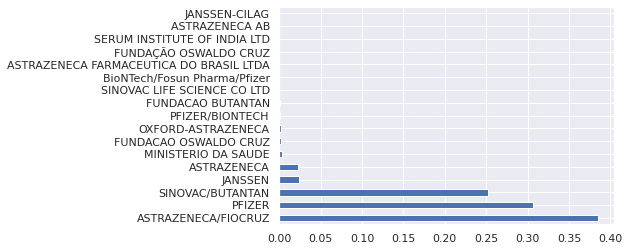

In [15]:
vacina_SC.vacina_fabricante_nome.value_counts(normalize=True).plot(kind='barh')

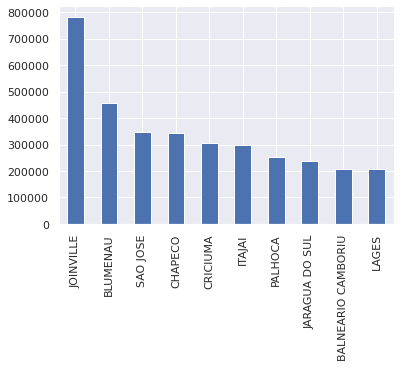

In [21]:
vacina_SC.estabelecimento_municipio_nome.value_counts()[1:].head(10).plot(kind='bar')

In [25]:
vacina_SC.drop_duplicates(inplace=True)

In [26]:
vacina_SC.groupby(['paciente_id','vacina_descricao_dose']).agg({'document_id': 'count'}).sort_values(by='document_id', ascending=False)

document_id
paciente_id                                        vacina_descricao_dose             
019d1aaa4cd74521a9ca8d83d05f5a8de5e5f1f4f286a1b... 2ª Dose                          5
13354890e4a42108731327d6ffa185934ea8093fb5ad4f8... 1ª Dose                          5
3a32a8f60be7762537936ee7546440209c47b291e8eb741... 1ª Dose                          4
dc7e7600f89d4369261e89ad6c9b4a9bdc6dbdc83e15a1f... 1ª Dose                          4
6447272f4d37fda98af9e1c59999fb19f4e6994e9447610... 1ª Dose                          4
...                                                                               ...
558de9674cc8de0e0832a573429fbcd3467cdb6a31e4f48... 2ª Dose                          1
558de9b246cdbbc6494ef69bf78df7b03a15e1c5dc223c1... 1ª Dose                          1
                                                   2ª Dose                          1
                                                   Reforço                          1
ffffff559a4498e1fdb734fc8363d26a6bb8335f0875b1d... 1ª Dose                          1

[10008830 rows x 1 columns]

In [29]:
vacina_SC[vacina_SC.paciente_id== 'dc7e7600f89d4369261e89ad6c9b4a9bdc6dbdc83e15a1f3c4bc5c9948f78884']

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,paciente_endereco_nmpais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumnacionalidade,estabelecimento_valor,estabelecimento_razaosocial,estalecimento_nofantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoatendimento_codigo,vacina_grupoatendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
210933,09f931c6-1be8-4572-b83d-888e96043a93-i0b0,dc7e7600f89d4369261e89ad6c9b4a9bdc6dbdc83e15a1...,50.0,1971-05-10,F,1.0,BRANCA,421830.0,10.0,TRES BARRAS,BRASIL,SC,89490.0,B,7985347,MUNICIPIO DE TRES BARRAS,UNIDADE DE SAUDE JOSE SAWINSKI JOAO PAULO II,421830,TRES BARRAS,SC,201,Pessoas de 18 a 64 anos,2.0,Faixa Etária,214VCD097W,ASTRAZENECA/FIOCRUZ,Organization/33781055000135,2021-06-28,1ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,Novo PNI,2021-09-01T16:12:59.000Z,16341
2019418,1195f541-5a3a-47dd-bdac-62d0864e6993-i0b0,dc7e7600f89d4369261e89ad6c9b4a9bdc6dbdc83e15a1...,50.0,1971-05-10,F,1.0,BRANCA,421830.0,10.0,TRES BARRAS,BRASIL,SC,89490.0,B,7985347,MUNICIPIO DE TRES BARRAS,UNIDADE DE SAUDE JOSE SAWINSKI JOAO PAULO II,421830,TRES BARRAS,SC,201,Pessoas de 18 a 64 anos,2.0,Faixa Etária,214VCD097W,ASTRAZENECA/FIOCRUZ,Organization/33781055000135,2021-06-20,1ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,Novo PNI,2021-09-01T16:13:12.000Z,16341
4987024,2673edfd-be25-47e1-91ec-22b90aab9c82-i0b0,dc7e7600f89d4369261e89ad6c9b4a9bdc6dbdc83e15a1...,50.0,1971-05-10,F,1.0,BRANCA,421830.0,10.0,TRES BARRAS,BRASIL,SC,89490.0,B,7985347,MUNICIPIO DE TRES BARRAS,UNIDADE DE SAUDE JOSE SAWINSKI JOAO PAULO II,421830,TRES BARRAS,SC,201,Pessoas de 18 a 64 anos,2.0,Faixa Etária,214VCD097W,ASTRAZENECA/FIOCRUZ,Organization/33781055000135,2021-06-23,1ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,Novo PNI,2021-09-01T16:14:25.000Z,16341
7204618,947b6169-df5e-4c79-b7e5-9d83c3e7b32f-i0b0,dc7e7600f89d4369261e89ad6c9b4a9bdc6dbdc83e15a1...,50.0,1971-05-10,F,1.0,BRANCA,421830.0,10.0,TRES BARRAS,BRASIL,SC,89490.0,B,7985347,MUNICIPIO DE TRES BARRAS,UNIDADE DE SAUDE JOSE SAWINSKI JOAO PAULO II,421830,TRES BARRAS,SC,201,Pessoas de 18 a 64 anos,2.0,Faixa Etária,217VCD244W,ASTRAZENECA/FIOCRUZ,Organization/33781055000135,2021-09-01,2ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,Novo PNI,2021-09-01T16:15:04.000Z,16341
9293299,c69cc92e-70f9-45c2-aa62-e16acf709e8d-i0b0,dc7e7600f89d4369261e89ad6c9b4a9bdc6dbdc83e15a1...,50.0,1971-05-10,F,1.0,BRANCA,421830.0,10.0,TRES BARRAS,BRASIL,SC,89490.0,B,7985347,MUNICIPIO DE TRES BARRAS,UNIDADE DE SAUDE JOSE SAWINSKI JOAO PAULO II,421830,TRES BARRAS,SC,201,Pessoas de 18 a 64 anos,2.0,Faixa Etária,214VCD097W,ASTRAZENECA/FIOCRUZ,Organization/33781055000135,2021-06-15,1ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,Novo PNI,2021-09-01T16:13:41.000Z,16341


In [30]:
vacina_SC[vacina_SC.estabelecimento_municipio_nome== 'SAO JOSE']

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,paciente_endereco_nmpais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumnacionalidade,estabelecimento_valor,estabelecimento_razaosocial,estalecimento_nofantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoatendimento_codigo,vacina_grupoatendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
25,c82c538d-f8ec-49c3-822a-f6fb01c3805b-i0b0,ef3f0b1b6d65bd29e6739257f622b9d057135e768afc53...,68.0,1953-02-17,F,1.0,BRANCA,421660.0,10.0,SAO JOSE,BRASIL,SC,88113.0,B,2663805,SECRETARIA MUNICIPAL DE SAUDE DE SAO JOSE,CENTRO DE SAUDE PICADAS DO SUL,421660,SAO JOSE,SC,202,Pessoas de 65 a 69 anos,2.0,Faixa Etária,210099,SINOVAC/BUTANTAN,NaN,2021-03-27,1ª Dose,86,COVID-19 SINOVAC/BUTANTAN - CORONAVAC,ESUS APS - NACIONAL (OFFLINE),2021-04-05T10:00:08.000Z,18602
205,20af51c7-e6d1-46f0-962b-c8e769756f5c-i0b0,84d406914df7fa7ddda7b42758697d6a1d01e13329d2b7...,75.0,1945-07-15,F,1.0,BRANCA,421660.0,10.0,SAO JOSE,BRASIL,SC,88101.0,B,2663805,SECRETARIA MUNICIPAL DE SAUDE DE SAO JOSE,CENTRO DE SAUDE PICADAS DO SUL,421660,SAO JOSE,SC,204,Pessoas de 75 a 79 anos,2.0,Faixa Etária,210063,SINOVAC/BUTANTAN,NaN,2021-03-19,1ª Dose,86,COVID-19 SINOVAC/BUTANTAN - CORONAVAC,ESUS APS - NACIONAL (OFFLINE),2021-04-21T10:00:27.000Z,18602
248,378a4f26-7448-4920-b942-a5081b63ea11-i0b0,174f6d0add975e075eb247b274e417b8b571ebf67bb52b...,38.0,1982-11-03,M,1.0,BRANCA,421660.0,10.0,SAO JOSE,BRASIL,SC,88106.0,B,2663805,SECRETARIA MUNICIPAL DE SAUDE DE SAO JOSE,CENTRO DE SAUDE PICADAS DO SUL,421660,SAO JOSE,SC,926,Outros,9.0,Trabalhadores de Saúde,FA9094,PFIZER,NaN,2021-07-10,1ª Dose,87,COVID-19 PFIZER - COMIRNATY,ESUS APS - NACIONAL (OFFLINE),2021-07-13T10:01:50.000Z,18602
271,24f17720-77d7-4d8f-affb-d60fcfbb5f68-i0b0,942e7683a573146211c07acda3235935088716308e4303...,40.0,1980-12-19,M,99.0,SEM INFORMACAO,421660.0,10.0,SAO JOSE,BRASIL,SC,88101.0,B,2663805,SECRETARIA MUNICIPAL DE SAUDE DE SAO JOSE,CENTRO DE SAUDE PICADAS DO SUL,421660,SAO JOSE,SC,926,Outros,9.0,Trabalhadores de Saúde,215VCD147W,ASTRAZENECA/FIOCRUZ,NaN,2021-07-02,1ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,ESUS APS - NACIONAL (OFFLINE),2021-07-05T10:00:44.000Z,18602
276,07f13e58-8c3d-49d6-8b39-6cacd36b6ccd-i0b0,283408b25e610e8cfc73d1d5f1c7e47ba26999f630d67d...,45.0,1976-01-28,F,1.0,BRANCA,421660.0,10.0,SAO JOSE,BRASIL,SC,88108.0,B,2663805,SECRETARIA MUNICIPAL DE SAUDE DE SAO JOSE,CENTRO DE SAUDE PICADAS DO SUL,421660,SAO JOSE,SC,926,Outros,9.0,Trabalhadores de Saúde,FA9090,PFIZER,NaN,2021-06-25,1ª Dose,87,COVID-19 PFIZER - COMIRNATY,ESUS APS - NACIONAL (OFFLINE),2021-06-30T10:01:12.000Z,18602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10073537,ba71412d-5e84-4d8a-8bba-bfd9d050b9bb-i0b0,c4bbb86236215efeef9dcf7c690ed5f2b1f5586182c33f...,43.0,1978-01-18,F,1.0,BRANCA,421660.0,10.0,SAO JOSE,BRASIL,SC,88107.0,B,2663805,SECRETARIA MUNICIPAL DE SAUDE DE SAO JOSE,CENTRO DE SAUDE PICADAS DO SUL,421660,SAO JOSE,SC,926,Outros,9.0,Trabalhadores de Saúde,215VCD147W,ASTRAZENECA/FIOCRUZ,NaN,2021-07-03,1ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,ESUS APS - NACIONAL (OFFLINE),2021-07-05T10:00:48.000Z,18602
10073548,71c4120e-5b60-437e-be23-ba6f26d9550d-i0b0,a314ad52b7662fe5d8cc9adab2b5d93ee18b18304fe78f...,43.0,1977-09-06,M,1.0,BRANCA,421660.0,10.0,SAO JOSE,BRASIL,SC,88103.0,B,2663805,SECRETARIA MUNICIPAL DE SAUDE DE SAO JOSE,CENTRO DE SAUDE PICADAS DO SUL,421660,SAO JOSE,SC,926,Outros,9.0,Trabalhadores de Saúde,FD7208,PFIZER,NaN,2021-